## Visualize the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../Data/AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


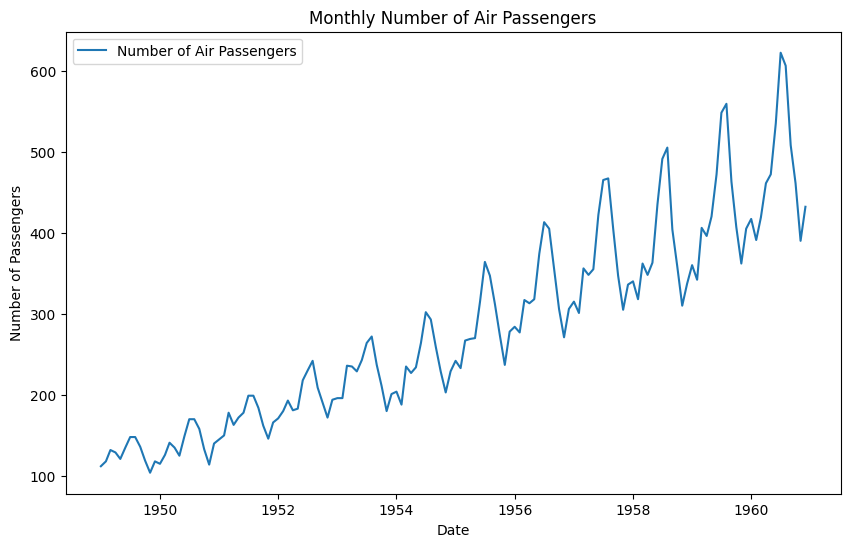

In [7]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Number of Air Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

## Decomposition of a Time Series 


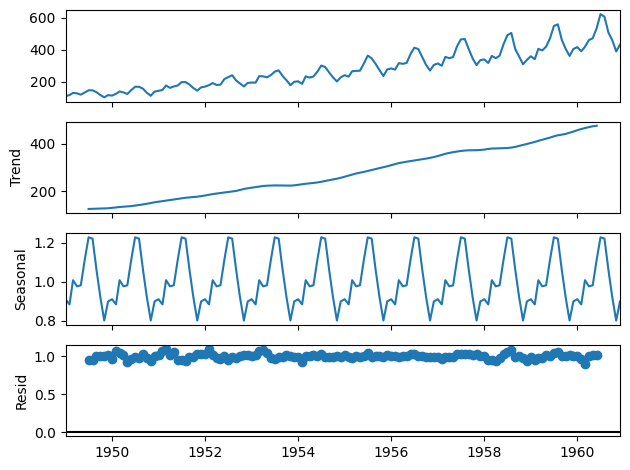

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

## Stationary and Non-Stationary Time Series.

In [10]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(data['#Passengers'])

In [11]:
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])

ADF Statistic: 0.8153688792060463
p-value: 0.991880243437641


In [12]:
for key, value in adf_test[4].items():
    print(f'Critical Value ({key}): {value}')


Critical Value (1%): -3.4816817173418295
Critical Value (5%): -2.8840418343195267
Critical Value (10%): -2.578770059171598


## Detrend a Time Series

In [14]:
detrended = data['#Passengers'] - result.trend
detrended

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Length: 144, dtype: float64

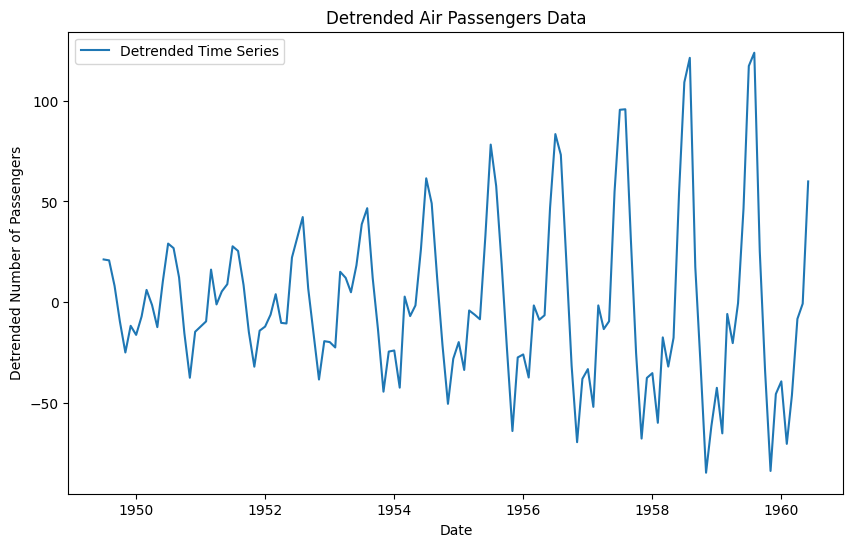

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(detrended, label='Detrended Time Series')
plt.title('Detrended Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Detrended Number of Passengers')
plt.legend()
plt.show()


## Deseasonalize a Time Series

In [16]:
deseasonalized = data['#Passengers'] / result.seasonal
deseasonalized

Month
1949-01-01    123.045774
1949-02-01    133.540764
1949-03-01    131.034760
1949-04-01    132.184860
1949-05-01    123.296015
                 ...    
1960-08-01    496.757563
1960-09-01    479.022974
1960-10-01    500.131683
1960-11-01    486.783162
1960-12-01    480.627812
Length: 144, dtype: float64

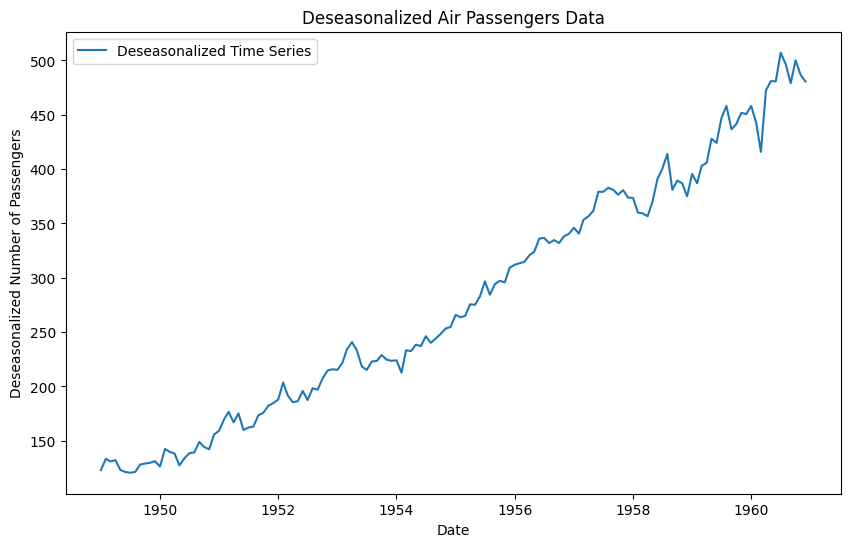

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(deseasonalized, label='Deseasonalized Time Series')
plt.title('Deseasonalized Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Deseasonalized Number of Passengers')
plt.legend()
plt.show()

## Autocorrelation and Partial Autocorrelation Functions

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1000x600 with 0 Axes>

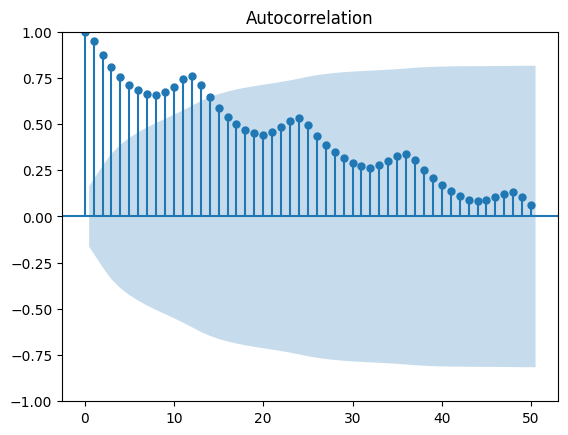

In [19]:

plt.figure(figsize=(10, 6))
plot_acf(data, lags=50)
plt.show()

<Figure size 1000x600 with 0 Axes>

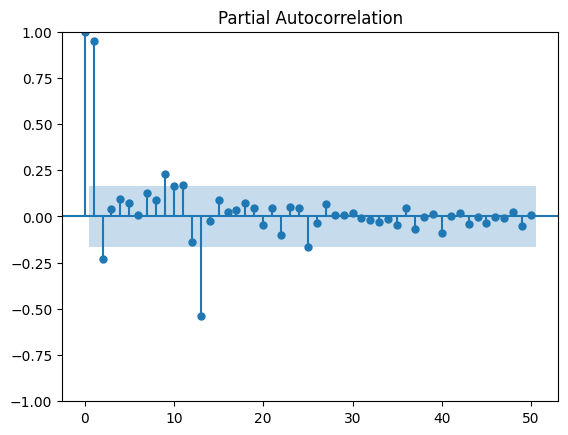

In [20]:
plt.figure(figsize=(10, 6))
plot_pacf(data, lags=50)
plt.show()

## Granger Causality Test

In [21]:
from statsmodels.tsa.stattools import grangercausalitytests

In [22]:
data['Passengers_Lagged'] = data['#Passengers'].shift(1)

In [23]:
granger_test_result = grangercausalitytests(data[['#Passengers', 'Passengers_Lagged']].dropna(), maxlag=4)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.8776 , p=0.0001  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=17.2419 , p=0.0000  , df=1
likelihood ratio test: chi2=16.2728 , p=0.0001  , df=1
parameter F test:         F=16.8776 , p=0.0001  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7107  , p=0.0701  , df_denom=137, df_num=2
ssr based chi2 test:   chi2=5.5798  , p=0.0614  , df=2
likelihood ratio test: chi2=5.4722  , p=0.0648  , df=2
parameter F test:         F=11.3459 , p=0.0000  , df_denom=137, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9003  , p=0.4429  , df_denom=135, df_num=3
ssr based chi2 test:   chi2=2.8009  , p=0.4234  , df=3
likelihood ratio test: chi2=2.7732  , p=0.4279  , df=3
parameter F test:         F=8.5546  , p=0.0000  , df_denom=135, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0180  , p=0.0955  